In [19]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
# Step 1: Fetch the Wikipedia page for AFI's 100 Movies
url = "https://en.wikipedia.org/wiki/AFI%27s_100_Years...100_Movies"
response = requests.get(url)

if response.status_code == 200:
    print("Page fetched successfully!")
else:
    print(f"Failed to fetch page. Status code: {response.status_code}")
    exit()


Page fetched successfully!


In [53]:
# Step 2: Parse the page content
soup = BeautifulSoup(response.content, 'html.parser')


In [69]:
# Loop through each row in the table (skipping header row)
for row in table.find_all('tr')[1:]:  # Skip header
    columns = row.find_all('td')
    
    # Check if the row has valid data (6 columns: Title, Year, Director, etc.)
    if len(columns) == 6:
        title = columns[0].text.strip()
        year = columns[1].text.strip()
        director = columns[2].text.strip()
        production_companies = columns[3].text.strip() if len(columns) > 3 else 'Unknown'
        rank_1998 = columns[4].text.strip() if len(columns) > 4 else 'NaN'
        rank_2007 = columns[5].text.strip() if len(columns) > 5 else 'NaN'
        
        # Append movie data to list
        movies.append([title, year, director, production_companies, rank_1998, rank_2007])

# Step 4: Store the data in a Pandas DataFrame
df = pd.DataFrame(movies, columns=['Title', 'Year', 'Director', 'Production companies', '1998 Rank', '2007 Rank'])


In [71]:
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['1998 Rank'] = pd.to_numeric(df['1998 Rank'], errors='coerce')
df['2007 Rank'] = pd.to_numeric(df['2007 Rank'], errors='coerce')

# Show the first few rows to check data extraction
print("\nSample Data:")
print(df.head())


Sample Data:
                Title  Year              Director Production companies  \
0        Citizen Kane  1941          Orson Welles                 None   
1          Casablanca  1942        Michael Curtiz                 None   
2       The Godfather  1972  Francis Ford Coppola                 None   
3  Gone with the Wind  1939        Victor Fleming                 None   
4  Lawrence of Arabia  1962            David Lean                 None   

   1998 Rank  2007 Rank  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


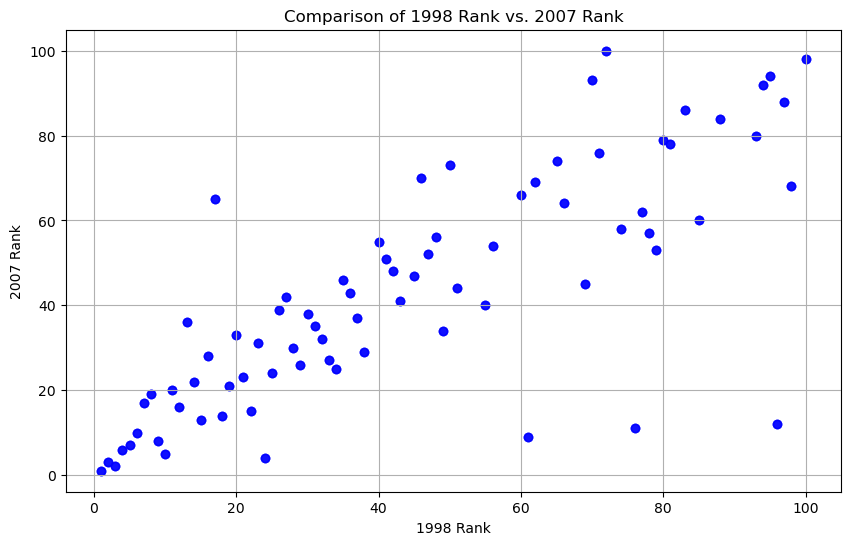

In [73]:
plt.figure(figsize=(10, 6))
plt.scatter(df['1998 Rank'], df['2007 Rank'], color='blue', alpha=0.6)
plt.title('Comparison of 1998 Rank vs. 2007 Rank')
plt.xlabel('1998 Rank')
plt.ylabel('2007 Rank')
plt.grid(True)
plt.show()

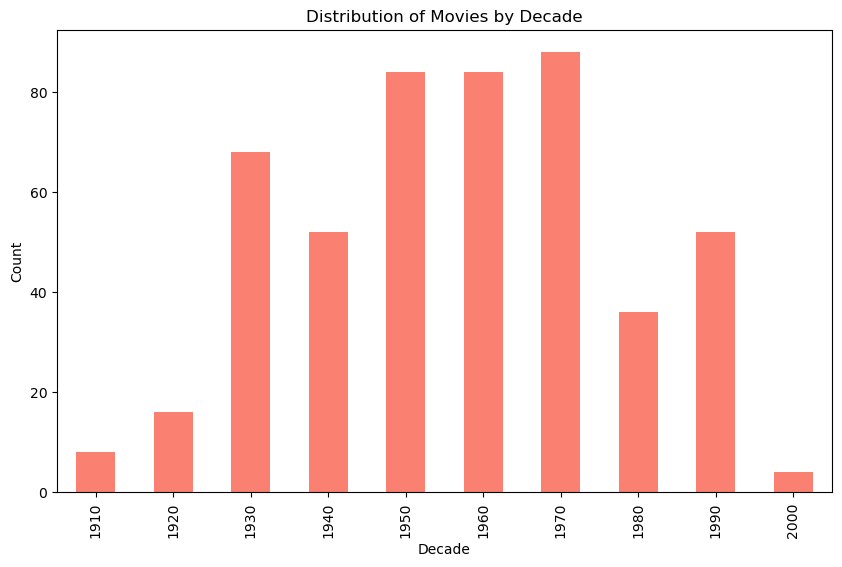

In [75]:
# Distribution of Movies by Decade
df['Decade'] = (df['Year'] // 10) * 10  # Group movies by decade
plt.figure(figsize=(10, 6))
df['Decade'].dropna().value_counts().sort_index().plot(kind='bar', color='salmon')
plt.title('Distribution of Movies by Decade')
plt.xlabel('Decade')
plt.ylabel('Count')
plt.show()


In [77]:
# Top Directors (with most movies in the list)
top_directors = df['Director'].value_counts().head(10)
print("\nTop 10 Directors with the most movies on the list:")
print(top_directors)


Top 10 Directors with the most movies on the list:
Director
Steven Spielberg    24
Billy Wilder        16
George Stevens      16
Stanley Kubrick     16
Alfred Hitchcock    16
William Wyler       12
Charlie Chaplin     12
Martin Scorsese     12
John Huston         12
John Ford           12
Name: count, dtype: int64


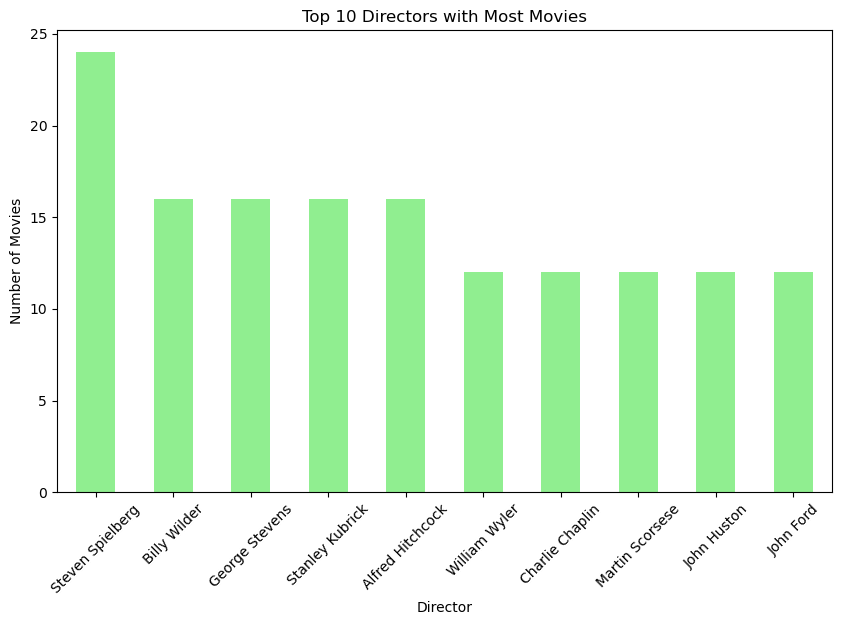

In [79]:
# Visualize Top Directors
plt.figure(figsize=(10, 6))
top_directors.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Directors with Most Movies')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

In [81]:

# Step 6: Top 10 Movies by 1998 Rank
top_10_movies_1998 = df.sort_values(by='1998 Rank').head(10)
print("\nTop 10 Movies by 1998 Rank:")
print(top_10_movies_1998)


Top 10 Movies by 1998 Rank:
                  Title  Year              Director  \
123        Citizen Kane  1941          Orson Welles   
369        Citizen Kane  1941          Orson Welles   
246        Citizen Kane  1941          Orson Welles   
124          Casablanca  1942        Michael Curtiz   
370          Casablanca  1942        Michael Curtiz   
247          Casablanca  1942        Michael Curtiz   
125       The Godfather  1972  Francis Ford Coppola   
371       The Godfather  1972  Francis Ford Coppola   
248       The Godfather  1972  Francis Ford Coppola   
126  Gone with the Wind  1939        Victor Fleming   

                       Production companies  1998 Rank  2007 Rank  Decade  
123                      RKO Radio Pictures        1.0        1.0    1940  
369                      RKO Radio Pictures        1.0        1.0    1940  
246                      RKO Radio Pictures        1.0        1.0    1940  
124                   Warner Bros. Pictures        2.0       

In [83]:
# Step 7: Top 10 Movies by 2007 Rank
top_10_movies_2007 = df.sort_values(by='2007 Rank').head(10)
print("\nTop 10 Movies by 2007 Rank:")
print(top_10_movies_2007)


Top 10 Movies by 2007 Rank:
             Title  Year              Director  \
123   Citizen Kane  1941          Orson Welles   
369   Citizen Kane  1941          Orson Welles   
246   Citizen Kane  1941          Orson Welles   
125  The Godfather  1972  Francis Ford Coppola   
371  The Godfather  1972  Francis Ford Coppola   
248  The Godfather  1972  Francis Ford Coppola   
247     Casablanca  1942        Michael Curtiz   
370     Casablanca  1942        Michael Curtiz   
124     Casablanca  1942        Michael Curtiz   
146    Raging Bull  1980       Martin Scorsese   

                       Production companies  1998 Rank  2007 Rank  Decade  
123                      RKO Radio Pictures        1.0        1.0    1940  
369                      RKO Radio Pictures        1.0        1.0    1940  
246                      RKO Radio Pictures        1.0        1.0    1940  
125  Paramount Pictures, Alfran Productions        3.0        2.0    1970  
371  Paramount Pictures, Alfran Producti

In [85]:
# Correlation between 1998 and 2007 Rank
correlation = df[['1998 Rank', '2007 Rank']].corr()
print("\nCorrelation between 1998 and 2007 Rank:")
print(correlation)


Correlation between 1998 and 2007 Rank:
           1998 Rank  2007 Rank
1998 Rank   1.000000   0.784056
2007 Rank   0.784056   1.000000


In [87]:
# Average Rank by Decade (1998 and 2007)
avg_rank_by_decade = df.groupby('Decade')[['1998 Rank', '2007 Rank']].mean()
print("\nAverage Rank by Decade:")
print(avg_rank_by_decade)


Average Rank by Decade:
        1998 Rank  2007 Rank
Decade                      
1910    44.000000  49.000000
1920    82.000000  52.666667
1930    57.866667  47.916667
1940    35.750000  35.000000
1950    45.050000  38.812500
1960    48.777778  48.941176
1970    48.222222  51.050000
1980    51.166667  66.625000
1990    73.875000  75.090909
2000          NaN  50.000000


In [89]:
# Top 10 Movies per Year
top_movies_by_year = df.groupby('Year').head(1)  # Best movie per year
print("\nTop Movies by Year:")
print(top_movies_by_year[['Year', 'Title', '1998 Rank', '2007 Rank']])


Top Movies by Year:
     Year                Title  1998 Rank  2007 Rank
0    1941         Citizen Kane        NaN        NaN
1    1942           Casablanca        NaN        NaN
2    1972        The Godfather        NaN        NaN
3    1939   Gone with the Wind        NaN        NaN
4    1962   Lawrence of Arabia        NaN        NaN
..    ...                  ...        ...        ...
107  1998  Saving Private Ryan        NaN        NaN
113  1997              Titanic        NaN        NaN
116  1999      The Sixth Sense        NaN        NaN
120  1989   Do the Right Thing        NaN        NaN
122  1995            Toy Story        NaN        NaN

[67 rows x 4 columns]


In [91]:
# Average Rank per Director
avg_rank_by_director = df.groupby('Director')[['1998 Rank', '2007 Rank']].mean()
avg_rank_by_director_sorted = avg_rank_by_director.sort_values(by='1998 Rank').head(10)
print("\nTop 10 Directors by Average Rank (1998):")
print(avg_rank_by_director_sorted)


Top 10 Directors by Average Rank (1998):
                           1998 Rank  2007 Rank
Director                                       
Orson Welles                1.000000   1.000000
Victor Fleming              5.000000   8.000000
Mike Nichols                7.000000  42.000000
Gene Kelly, Stanley Donen  10.000000   5.000000
Joseph L. Mankiewicz       16.000000  28.000000
Roman Polanski             19.000000  21.000000
David Lean                 19.000000  21.500000
Francis Ford Coppola       21.000000  21.333333
John Huston                23.333333  44.666667
Frank Capra                25.000000  30.666667


In [93]:
# Calculate rank change
df['Rank Change'] = df['1998 Rank'] - df['2007 Rank']

# Top 10 movies with the greatest rank change
top_rank_change = df[['Title', '1998 Rank', '2007 Rank', 'Rank Change']].sort_values(by='Rank Change', ascending=False).head(10)
print("\nTop 10 Movies with Greatest Rank Change:")
print(top_rank_change)


Top 10 Movies with Greatest Rank Change:
             Title  1998 Rank  2007 Rank  Rank Change
341  The Searchers       96.0       12.0         84.0
464  The Searchers       96.0       12.0         84.0
218  The Searchers       96.0       12.0         84.0
198    City Lights       76.0       11.0         65.0
444    City Lights       76.0       11.0         65.0
321    City Lights       76.0       11.0         65.0
429        Vertigo       61.0        9.0         52.0
183        Vertigo       61.0        9.0         52.0
306        Vertigo       61.0        9.0         52.0
466     Unforgiven       98.0       68.0         30.0


In [95]:
# Top 5 Movies with the Highest Rank in 1998
top_5_1998 = df.sort_values(by='1998 Rank').head(5)
print("\nTop 5 Movies with the Highest Rank in 1998:")
print(top_5_1998[['Title', '1998 Rank', '2007 Rank']])

# Top 5 Movies with the Lowest Rank in 1998
lowest_5_1998 = df.sort_values(by='1998 Rank', ascending=False).head(5)
print("\nTop 5 Movies with the Lowest Rank in 1998:")
print(lowest_5_1998[['Title', '1998 Rank', '2007 Rank']])


Top 5 Movies with the Highest Rank in 1998:
            Title  1998 Rank  2007 Rank
123  Citizen Kane        1.0        1.0
369  Citizen Kane        1.0        1.0
246  Citizen Kane        1.0        1.0
124    Casablanca        2.0        3.0
370    Casablanca        2.0        3.0

Top 5 Movies with the Lowest Rank in 1998:
                            Title  1998 Rank  2007 Rank
468           Yankee Doodle Dandy      100.0       98.0
222           Yankee Doodle Dandy      100.0       98.0
345           Yankee Doodle Dandy      100.0       98.0
467  Guess Who's Coming to Dinner       99.0        NaN
221  Guess Who's Coming to Dinner       99.0        NaN


In [97]:
# Average Rank by Production Company
avg_rank_by_production = df.groupby('Production companies')[['1998 Rank', '2007 Rank']].mean()
avg_rank_by_production_sorted = avg_rank_by_production.sort_values(by='1998 Rank').head(10)
print("\nTop 10 Production Companies by Average Rank (1998):")
print(avg_rank_by_production_sorted)


Top 10 Production Companies by Average Rank (1998):
                                         1998 Rank  2007 Rank
Production companies                                         
Paramount Pictures, Alfran Productions         3.0        2.0
Selznick International Pictures                4.0        6.0
Horizon Pictures                               5.0        7.0
Lawrence Turman                                7.0       17.0
Amblin Entertainment                           9.0        8.0
Horizon-American Pictures                     10.5       27.5
Liberty Pictures                              11.0       20.0
Ashton Productions, The Mirisch Company       14.0       22.0
Horizon Enterprises, Romulus Films            17.0       65.0
Shamley Productions                           18.0       14.0
